In [12]:
"""
Python numpy code for Latent Semantic Analysis
on a synthetic dataset.
(LSA). 
"""
import numpy as np
print np.__version__
import matplotlib.pyplot as plt

1.12.0


In [13]:
num_examples = 500

# We create a random feature vector
x0 = np.rint(np.random.normal(0, 100,
                              num_examples))

# Then we create another feature vector which is
# highly correlated with the previous feature:
# x1 = 2 * x0.
# We add random noise to this second feature.
# Thus x0 and x1 are highly correlated.
random_noise = np.rint(np.random.normal(0,
                                        2,
                                        num_examples)) 
x1 = 2*x0 + random_noise

# x2 is a random vector with all values close to 0
x2 = np.rint(np.random.normal(0, 5,
                              num_examples))

# Create a 3D dataset X = [x0 x1 x2]
X = np.column_stack((x0, x1, x2))

# Perform SVD
U, S, V_t = np.linalg.svd(X)
V = V_t.T

# Note: the third singular value is very low
#       relative to the first.
print("Singular values are:\n{}, {}, {}".\
      format(S[0], S[1], S[2]))

# Assert that the row vectors of V are orthogonal
assert np.allclose(np.dot(V.T, V), np.eye(3))

# Assert that the column vectors are orthonormal
assert np.allclose(np.linalg.norm(V, axis=0),
                   np.ones(3))

Singular values are:
5305.37495081, 109.572182265, 19.4568281491


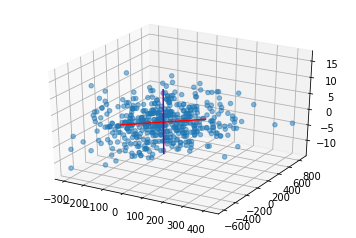

In [14]:
#3D plotting of the points and principal components
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],
             alpha = 0.5)
mean = np.mean(X, axis=0)

pc0 = V[:, 0]
pc1 = V[:, 1]

#plot the first principal component
pc0_line = np.array([t * pc0
                     for t in np.linspace(-300,
                                          300, 20)])
#print pc0_line
ax.plot(pc0_line[:,0], pc0_line[:, 1],
        pc0_line[:, 2], c= 'red')

#plot the second principal component
pc1_line = np.array([t * pc1
                     for t in np.linspace(-10,
                                          10, 10)])
#print pc1_line
ax.plot(pc1_line[:,0], pc1_line[:, 1],
        pc1_line[:, 2], c= 'purple')

plt.show()